<a href="https://colab.research.google.com/github/SenghengMeasheanh/face_emotion_recognition/blob/main/model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Final Project: Realtime Facial Emotion Recognition
# Group 7
## Member:
*   Measheanh Sengheng
*   Lim Chanvina
*   You Chanvichea
*   Yin vanthoura



## Import Libraries

In [1]:
from tensorflow.keras.applications import MobileNetV2,ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

## Mount to Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Unzip dataset

In [3]:
!unzip /content/drive/MyDrive/DATASET/dataset.zip  # unzip dataset and store in /content/

Streaming output truncated to the last 5000 lines.
 extracting: datasets/test/5/PrivateTest_56435349.jpg  
 extracting: datasets/test/5/PublicTest_38685191.jpg  
 extracting: datasets/test/5/PublicTest_53469582.jpg  
 extracting: datasets/test/5/PublicTest_20668878.jpg  
 extracting: datasets/test/5/PublicTest_26204727.jpg  
 extracting: datasets/test/5/PublicTest_37314285.jpg  
 extracting: datasets/test/5/PrivateTest_9966612.jpg  
 extracting: datasets/test/5/PublicTest_35827395.jpg  
 extracting: datasets/test/5/PublicTest_86781056.jpg  
 extracting: datasets/test/5/PublicTest_90433770.jpg  
 extracting: datasets/test/5/PrivateTest_51237975.jpg  
 extracting: datasets/test/5/PrivateTest_12667445.jpg  
 extracting: datasets/test/5/PublicTest_52052256.jpg  
 extracting: datasets/test/5/PrivateTest_55776357.jpg  
 extracting: datasets/test/5/PublicTest_97307607.jpg  
 extracting: datasets/test/5/PrivateTest_72167156.jpg  
 extracting: datasets/test/5/PrivateTest_92287987.jpg  
 extract

## Visualize Image Size

In [4]:
img_array = cv2.imread("/content/datasets/train/0/Training_1021836.jpg")

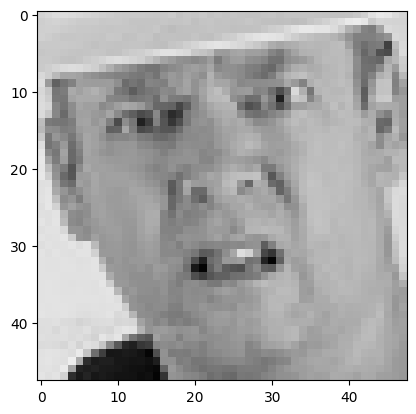

In [5]:
plt.imshow(img_array)

## Data Preprpcessing

### Data Augmentation and Normalization

In [6]:
# ImageDataGenerator for training data
datagen_train = ImageDataGenerator(
    rescale=1./255,               # Rescales pixel values to the range [0, 1] by dividing by 255
    rotation_range=30,            # Randomly rotates images within a range of 30 degrees
    width_shift_range=0.2,        # Randomly shifts images horizontally by 20% of the total width
    height_shift_range=0.2,       # Randomly shifts images vertically by 20% of the total height
    shear_range=0.2,              # Randomly applies shear transformations with a shear intensity of 0.2
    zoom_range=0.2,               # Randomly zooms in/out on images within a range of 20%
    horizontal_flip=True,         # Randomly flips images horizontally
    fill_mode='nearest',          # Determines how pixels outside the input boundaries are filled (e.g., nearest)
    validation_split=0.2          # Reserves 20% of the data for validation
)

# ImageDataGenerator for validation data
datagen_val = ImageDataGenerator(
    rescale=1./255,               # Rescales pixel values to the range [0, 1] by dividing by 255
    validation_split=0.2          # Ensures 20% of the data is used for validation
)


### Generate Datasets and Resize Image

In [7]:
# Image size to which images will be resized
img_size = 224

# Generating training dataset
training_set = datagen_train.flow_from_directory(
    '/content/datasets/train',     # Directory containing training images
    target_size=(img_size, img_size),  # Resize all images to 224x224 pixels as ResNet50 and MobileNetV2
    batch_size=64,                # Number of images per batch during training
    class_mode='sparse',          # Labels are integers (sparse categorical mode)
    subset='training'             # Specifies that this is the training subset (80% of data, as per validation_split)
)

# Generating validation dataset
validation_set = datagen_val.flow_from_directory(
    '/content/datasets/train',     # Directory containing validation images
    target_size=(img_size, img_size),  # Resize all images to 224x224 pixels
    batch_size=64,                # Number of images per batch during validation
    class_mode='sparse',          # Labels are integers (sparse categorical mode)
    subset='validation'           # Specifies that this is the validation subset (20% of data, as per validation_split)
)


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


## Model Fine-tuning

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### ModelNetV2

In [ ]:
# Load MobileNetV2 from tensorflow
model = MobileNetV2()

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#view MobileNetV2 architecture
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
# store input and output layer in variable
base_input = model.layers[1].input
base_output = model.layers[-2].output

In [ ]:
# modify MobileNetV2 fully connected layer by added 2 more dense layers with 128 and 64 units using relu activation, and change output to 7 classes
final_output = layers.Dense(128)(base_output)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_ouput)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_ouput)

In [ ]:
# pass input and output to new model
new_model = keras.Model(inputs=base_input, outputs=final_output)

In [ ]:
# view new model architecture
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,430,663 (9.27 MB)

 Trainable params: 2,396,551 (9.14 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
# compile model using sparse categorical crossentropy loss function due to label encoded classes and optimizer adam
new_model.compile(loss="sparse_categorical_crossentropy",metrics=["accuracy"], optimizer="adam")

In [9]:
from tensorflow.keras import callbacks
# Callbacks for training
# use model checkpoint to save best performance, and save model in case of runtime disconnected or out of resources mid training
checkpoint = callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/DATASET/64batchmobilenetmodel_{epoch:02d}_{val_accuracy:.2f}.keras',
    monitor="val_accuracy",
    verbose=0,
    save_best_only=True
)
# use it to reduce learning rate during training to boost model performance if the val_loss doesn't decrease in every 4epoch
lr_scheduler = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    patience=4,
    factor=0.3,
    min_lr=1e-6
)

In [ ]:
# fit dataset to model
new_model.fit(
    training_set,
    epochs=40,
    batch_size=64,
    validation_data=validation_set,
    shuffle=True,
    callbacks=[checkpoint, lr_scheduler]
)

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 399s 942ms/step - accuracy: 0.3973 - loss: 1.5433 - val_accuracy: 0.2923 - val_loss: 6.1472 - learning_rate: 0.0010
Epoch 2/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 305s 836ms/step - accuracy: 0.5433 - loss: 1.2053 - val_accuracy: 0.3604 - val_loss: 4.4433 - learning_rate: 0.0010
Epoch 3/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 325s 843ms/step - accuracy: 0.5780 - loss: 1.1243 - val_accuracy: 0.3895 - val_loss: 2.7577 - learning_rate: 0.0010
Epoch 4/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 306s 837ms/step - accuracy: 0.6025 - loss: 1.0540 - val_accuracy: 0.2869 - val_loss: 5.3917 - learning_rate: 0.0010
Epoch 5/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 322s 885ms/step - accuracy: 0.6145 - loss: 1.0275 - val_accuracy: 0.4208 - val_loss: 2.7946 - learning_rate: 0.0010
Epoch 6/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 312s 856ms/step - accuracy: 0.6280 - loss: 1.0061 - val_accuracy: 0.3632 - val_loss: 3.0546 - learning_rate: 0.0010
Epoch 7/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 343s 944ms/step - accuracy: 0.6359 

### ResNet50

In [10]:
#Load ResNet50 from tensorflow
resnet_model = ResNet50()

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [11]:
#View ResNet50 architecture
resnet_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [21]:
# store input and output layer in the variable
resnet_base_input = resnet_model.layers[1].input
resnet_base_output = resnet_model.layers[-2].output

In [22]:
# modify ResNet50 fully connected layer by added 2 more dense layers with 128 and 64 units using relu activation, and change output to 7 classes
resnet_final_output = layers.Dense(128)(resnet_base_output)
resnet_final_ouput = layers.Activation('relu')(resnet_final_output)
resnet_final_output = layers.Dense(64)(resnet_final_ouput)
resnet_final_ouput = layers.Activation('relu')(resnet_final_output)
resnet_final_output = layers.Dense(7, activation='softmax')(resnet_final_ouput)

In [23]:
# pass input and output to new model
resnet_new_model = keras.Model(inputs=resnet_base_input, outputs=resnet_final_output)

In [24]:
# view new architecture
resnet_new_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,858,695 (91.01 MB)

 Trainable params: 23,805,575 (90.81 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [25]:
# compile model using sparse categorical crossentropy loss function due to label encoded classes and optimizer adam
resnet_new_model.compile(loss="sparse_categorical_crossentropy",metrics=["accuracy"], optimizer="adam")

In [26]:
# Callbacks for training
# use model checkpoint to save best performance, and save model in case of runtime disconnected or out of resources mid training
resnet_checkpoint = callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/DATASET/64batchresnetmodel_{epoch:02d}_{val_accuracy:.2f}.keras',
    monitor="val_accuracy",
    verbose=0,
    save_best_only=True
)
# use it to reduce learning rate during training to boost model performance if the val_loss doesn't decrease in every 4epoch
resnet_lr_scheduler = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    patience=4,
    factor=0.3,
    min_lr=1e-6
)

In [27]:
 # fit dataset to model
 resnet_new_model.fit(
    training_set,
    epochs=40,
    batch_size=64,
    validation_data=validation_set,
    shuffle=True,
    callbacks=[resnet_checkpoint, resnet_lr_scheduler]
)

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 364s 821ms/step - accuracy: 0.3261 - loss: 1.6894 - val_accuracy: 0.1683 - val_loss: 1.8919 - learning_rate: 0.0010
Epoch 2/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 255s 697ms/step - accuracy: 0.4795 - loss: 1.3476 - val_accuracy: 0.3379 - val_loss: 1.6463 - learning_rate: 0.0010
Epoch 3/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 256s 700ms/step - accuracy: 0.5287 - loss: 1.2332 - val_accuracy: 0.3761 - val_loss: 1.6330 - learning_rate: 0.0010
Epoch 4/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 256s 700ms/step - accuracy: 0.5557 - loss: 1.1725 - val_accuracy: 0.5163 - val_loss: 1.2946 - learning_rate: 0.0010
Epoch 5/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 253s 690ms/step - accuracy: 0.5611 - loss: 1.1361 - val_accuracy: 0.1947 - val_loss: 2.2131 - learning_rate: 0.0010
Epoch 6/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 254s 695ms/step - accuracy: 0.5865 - loss: 1.1013 - val_accuracy: 0.5269 - val_loss: 1.2521 - learning_rate: 0.0010
Epoch 7/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 255s 697ms/step - accuracy: 0.5912 

## Evaluation

### Load Model

In [30]:
resnet = tf.keras.models.load_model('/content/drive/MyDrive/DATASET/64BacthResNet50model.keras')
mobilenet = tf.keras.models.load_model('/content/drive/MyDrive/40epoch64bmobilenet.keras')

### Generate test set

In [31]:
def create_test_set(test_data_dir, img_size=224, batch_size=64):

    test_datagen = ImageDataGenerator(rescale=1./255)
    test_set = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='sparse',
        shuffle=False
    )
    return test_set

In [32]:
cadt_test_set = create_test_set("/content/drive/MyDrive/DATASET/cadt-test/")
fer_test_set = create_test_set("/content/datasets/test/")

Found 173 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [33]:
from sklearn.metrics import classification_report
import numpy as np

def evaluate_model(model, test_set):
    # Generate predictions
    predictions = model.predict(test_set)

    # Get predicted classes and true classes
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_set.classes

    # Get class labels
    class_labels = list(test_set.class_indices.keys())

    # Generate and print the classification report
    report = classification_report(true_classes, predicted_classes, target_names=class_labels)
    print(report)


### Evaluate with FER test set

In [34]:
evaluate_model(mobilenet, fer_test_set)
evaluate_model(resnet, fer_test_set)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 123ms/step
              precision    recall  f1-score   support

           0       0.60      0.63      0.61       958
           1       0.76      0.59      0.66       111
           2       0.56      0.47      0.51      1024
           3       0.89      0.88      0.88      1774
           4       0.63      0.67      0.65      1233
           5       0.56      0.60      0.58      1247
           6       0.79      0.79      0.79       831

    accuracy                           0.69      7178
   macro avg       0.68      0.66      0.67      7178
weighted avg       0.69      0.69      0.69      7178

113/113 ━━━━━━━━━━━━━━━━━━━━ 25s 192ms/step
              precision    recall  f1-score   support

           0       0.54      0.67      0.60       958
           1       0.68      0.48      0.56       111
           2       0.51      0.46      0.48      1024
           3       0.88      0.86      0.87      1774
           4       0.63      0.65      0.64 

### Evaluate with Our Test set

In [35]:
evaluate_model(mobilenet, cadt_test_set)
evaluate_model(resnet, cadt_test_set)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 36s 18s/step
              precision    recall  f1-score   support

           0       0.38      0.19      0.26        26
           1       0.00      0.00      0.00        25
           2       0.33      0.20      0.25        20
           3       0.51      0.56      0.53        36
           4       0.24      0.42      0.31        26
           5       0.20      0.55      0.29        20
           6       0.86      0.30      0.44        20

    accuracy                           0.33       173
   macro avg       0.36      0.32      0.30       173
weighted avg       0.36      0.33      0.31       173



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 839ms/step
              precision    recall  f1-score   support

           0       0.17      0.19      0.18        26
           1       0.00      0.00      0.00        25
           2       0.71      0.25      0.37        20
           3       0.69      0.56      0.62        36
           4       0.34      0.54      0.42        26
           5       0.18      0.50      0.26        20
           6       0.55      0.30      0.39        20

    accuracy                           0.35       173
   macro avg       0.38      0.33      0.32       173
weighted avg       0.39      0.35      0.34       173



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### We pick ResNet50 as the model for live detection as it perform better on small dataset